## Data Analysis on CitiBike Data on South Street Station on 2016/09



### data source: https://s3.amazonaws.com/tripdata/index.html
### Author: Elaine Chang

---

#### Import Packages 

In [1]:
import pylab as pl #plot package
import pandas as pd #powerful dataframe package
import numpy as np # math package
import datetime 
%pylab inline 
#magic line to make the plot show 


Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv("201609-citibike-tripdata.csv")  # Might take few seconds.
data.head() 


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,975,9/1/2016 00:00:02,9/1/2016 00:16:18,312,Allen St & Stanton St,40.722055,-73.989111,313,Washington Ave & Park Ave,40.696102,-73.967510,22609,Subscriber,1985.0,1
1,1220,9/1/2016 00:00:04,9/1/2016 00:20:25,316,Fulton St & William St,40.709560,-74.006536,239,Willoughby St & Fleet St,40.691966,-73.981302,16966,Subscriber,1977.0,2
2,308,9/1/2016 00:00:19,9/1/2016 00:05:27,479,9 Ave & W 45 St,40.760193,-73.991255,448,W 37 St & 10 Ave,40.756604,-73.997901,25601,Subscriber,1983.0,1
3,250,9/1/2016 00:00:25,9/1/2016 00:04:35,297,E 15 St & 3 Ave,40.734232,-73.986923,487,E 20 St & FDR Drive,40.733143,-73.975739,22094,Subscriber,1953.0,1
4,439,9/1/2016 00:00:25,9/1/2016 00:07:45,494,W 26 St & 8 Ave,40.747348,-73.997236,533,Broadway & W 39 St,40.752996,-73.987216,16319,Subscriber,1985.0,1


In [3]:
data.info()
#get a general idea of the data! More than One Million Trips One Month!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648856 entries, 0 to 1648855
Data columns (total 15 columns):
tripduration               1648856 non-null int64
starttime                  1648856 non-null object
stoptime                   1648856 non-null object
start station id           1648856 non-null int64
start station name         1648856 non-null object
start station latitude     1648856 non-null float64
start station longitude    1648856 non-null float64
end station id             1648856 non-null int64
end station name           1648856 non-null object
end station latitude       1648856 non-null float64
end station longitude      1648856 non-null float64
bikeid                     1648856 non-null int64
usertype                   1648856 non-null object
birth year                 1433341 non-null float64
gender                     1648856 non-null int64
dtypes: float64(5), int64(5), object(5)
memory usage: 188.7+ MB


In [4]:
sdata = data[['starttime','start station name']][data['start station name']=='South St & Gouverneur Ln']
# separate the data: people who returns the bike and people who rents the bike from same stop.
sdata.head(10)

,starttime,start station name
158,9/1/2016 00:15:40,South St & Gouverneur Ln
1621,9/1/2016 06:40:22,South St & Gouverneur Ln
1757,9/1/2016 06:46:49,South St & Gouverneur Ln
2847,9/1/2016 07:40:17,South St & Gouverneur Ln
4178,9/1/2016 08:20:56,South St & Gouverneur Ln
4867,9/1/2016 08:34:44,South St & Gouverneur Ln
5335,9/1/2016 08:43:28,South St & Gouverneur Ln
5457,9/1/2016 08:45:33,South St & Gouverneur Ln
6990,9/1/2016 09:41:05,South St & Gouverneur Ln
7373,9/1/2016 10:02:05,South St & Gouverneur Ln


In [5]:
ddata = data[['stoptime','end station name']] [data['end station name'].str.contains("South")]
ddata.head(10)

,stoptime,end station name
163,9/1/2016 00:19:07,South End Ave & Liberty St
261,9/1/2016 00:28:55,South End Ave & Liberty St
265,9/1/2016 01:02:40,South St & Gouverneur Ln
268,9/1/2016 00:50:20,South End Ave & Liberty St
331,9/1/2016 00:47:52,South End Ave & Liberty St
436,9/1/2016 01:01:31,South End Ave & Liberty St
437,9/1/2016 01:31:05,South St & Gouverneur Ln
602,9/1/2016 02:05:12,Pershing Square South
648,9/1/2016 02:32:38,South End Ave & Liberty St
686,9/1/2016 04:05:15,South End Ave & Liberty St


In [10]:
edata = data[['stoptime','end station name']] [data['end station name']=='South St & Gouverneur Ln']
edata.head(10)

,stoptime,end station name
265,9/1/2016 01:02:40,South St & Gouverneur Ln
437,9/1/2016 01:31:05,South St & Gouverneur Ln
1302,9/1/2016 06:32:04,South St & Gouverneur Ln
1403,9/1/2016 06:49:51,South St & Gouverneur Ln
2953,9/1/2016 08:03:24,South St & Gouverneur Ln
3071,9/1/2016 08:22:49,South St & Gouverneur Ln
3137,9/1/2016 08:23:57,South St & Gouverneur Ln
3255,9/1/2016 08:06:04,South St & Gouverneur Ln
3429,9/1/2016 08:24:52,South St & Gouverneur Ln
3546,9/1/2016 08:14:23,South St & Gouverneur Ln


In [6]:
sdata.loc[:,'starttime'] = sdata.starttime.astype("string").apply(lambda x: x[-8:-6]) 
#to extract the starttime on THE HOURS. such as 00,01,02...24
sdata.head()

,starttime,start station name
158,00,South St & Gouverneur Ln
1621,06,South St & Gouverneur Ln
1757,06,South St & Gouverneur Ln
2847,07,South St & Gouverneur Ln
4178,08,South St & Gouverneur Ln


In [7]:
edata.loc[:,'stoptime'] = edata.stoptime.astype("string").apply(lambda x: x[-8:-6]) 
edata.head()

,stoptime,end station name
265,01,South St & Gouverneur Ln
437,01,South St & Gouverneur Ln
1302,06,South St & Gouverneur Ln
1403,06,South St & Gouverneur Ln
2953,08,South St & Gouverneur Ln


#### Groupby 

In [8]:
countstart = sdata.groupby('starttime').size() # will have 24 groups !
countstart


starttime
00     21
01      1
02      2
03      1
06     59
07    107
08    304
09    180
10    161
11    141
12    200
13    165
14    234
15    247
16    325
17    689
18    436
19    239
20    129
21     53
22     30
23     29
dtype: int64

In [9]:
countend = edata.groupby('stoptime').size()
countend

stoptime
00     14
01      7
02      2
03      4
04      4
05      1
06     33
07    134
08    533
09    399
10    174
11    184
12    171
13    222
14    212
15    233
16    283
17    407
18    333
19    214
20     84
21     63
22     32
23     26
dtype: int64

### LET'S PLOT!

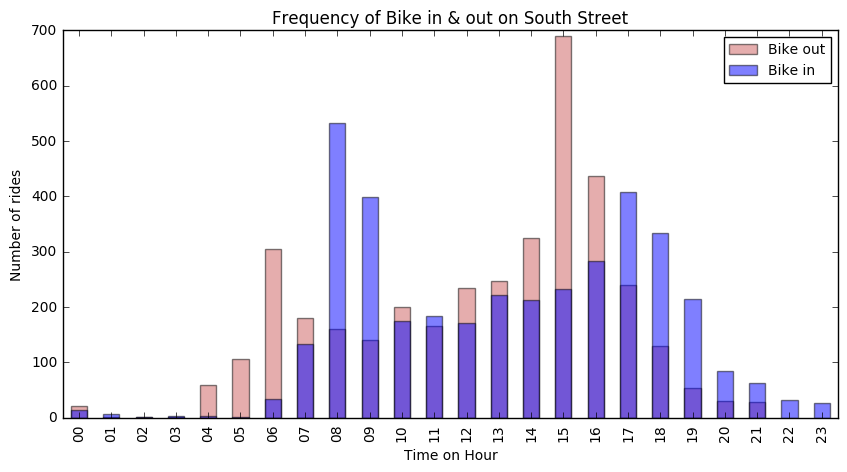

In [10]:
fig=pl.figure(figsize(10,5))
ax =(countstart).plot(kind="bar",color='IndianRed', alpha=0.5)
ax =(countend).plot(kind="bar",alpha=0.5, )
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Time on Hour")
ax.set_title("Frequency of Bike in & out on South Street")
pl.legend(['Bike out','Bike in '],fontsize=10)

### From this Graph, we can see that from 08 in the morning, bikes are coming in the most.
### Around 15, bikes are leaving the station the most.
### Did you find anything interesting?

---